In [1]:
import sys
sys.path.append('../../scripts/analysis')
sys.path.append('../../scripts/lda')
import pickle
from gensim.models.wrappers import LdaMallet
import numpy as np
import pandas as pd
import os
import shutil
import datetime
import lda_utils
from topics import run as save_topic_list, save_topics_with_samples

In [2]:
os.chdir("/Users/victor/Documents/tcc/new_discursos/src")

model_name = "65_it_10000"
speeches = pickle.load(open("data/speeches_all_preproc_filtered.pickle", "rb"))

In [3]:
model_path = "data/models/{}/model".format(model_name)
lda = LdaMallet.load(model_path)

topics_words = lda_utils.get_lda_topics_words(lda)
docs_topics = pickle.load(open("data/docs_topics_good_{}.pickle".format(model_name), "rb"))

indexed_doc_topics = []

for i, doc_topics in enumerate(docs_topics):
    for topic, weight in doc_topics:
        indexed_doc_topics.append(
            (i, speeches[i]['id'], speeches[i]['date'], topic, weight)
        )

all_speeches_df = pd.DataFrame(indexed_doc_topics, columns=["index", "id", "date", "topic", "weight"])
all_speeches_df['date'] = pd.to_datetime(all_speeches_df['date'])
all_speeches_df['year'] = all_speeches_df['date'].dt.year
all_speeches_df.drop('date', axis=1, inplace=True)

## Absolute speech count by year

In [4]:
speeches_date_df = pd.DataFrame([(i, s['date']) for i, s in enumerate(speeches)], columns=["i", "date"])
speeches_date_df['date'] = pd.to_datetime(speeches_date_df['date'])
speeches_date_df['year'] = speeches_date_df['date'].dt.year
speeches_date_df.drop('date', axis=1, inplace=True)

speeches_year_count_df = speeches_date_df.groupby('year').count().reset_index().rename(columns={"i": "count"})
speeches_year_count_df

,year,count
0,1995,2182
1,1996,2912
2,1997,2612
3,1998,1656
4,1999,2456
5,2000,2319
6,2001,2763
7,2002,1654
8,2003,3948
9,2004,3621


In [5]:
TOPIC = 23
speeches_year_weight_sum = pd.DataFrame(columns={'year': int(), 'weight_sum': float()})

year_range = range(1995, 2019 + 1)
for i, current_year in enumerate(year_range):
    #if current_year != 2002:
        #continue

    speeches_for_year_topic_df = all_speeches_df[
        (all_speeches_df['year'] == current_year) & 
        (all_speeches_df['topic'] == TOPIC)
    ]
    speeches_year_weight_sum.loc[i] = {
        "year": current_year, 
        "weight_sum": speeches_for_year_topic_df[['weight']].sum()['weight']
    }

In [6]:
speeches_year_weight_sum.head()

,year,weight_sum
0,1995,37.908672
1,1996,61.420775
2,1997,38.919596
3,1998,26.112026
4,1999,47.814227


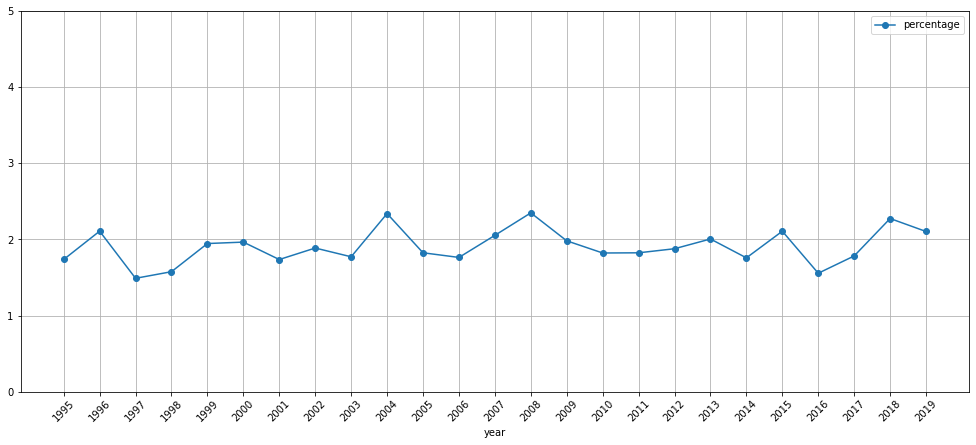

In [7]:
speeches_year_topic_percentage = speeches_year_count_df.copy()
speeches_year_topic_percentage.drop('count', axis=1, inplace=True)
speeches_year_topic_percentage['percentage'] = (speeches_year_weight_sum['weight_sum'] / speeches_year_count_df['count']) * 100


plot = speeches_year_topic_percentage.plot(x='year', y=['percentage'], marker='o', linestyle='-', grid=True, figsize=(17,7))


xticks = speeches_year_topic_percentage['year'].to_list()
plot.set_xticks(xticks)

plot.set_ylim(0.0, 5.0)


plot.xaxis.set_tick_params(rotation=45)
plot.patch.set_facecolor('white')

fig = plot.get_figure()



## Most representative documents for topics and year

In [15]:
selected_year = 2010
selected_topic = 63
num_docs = 5

print(topics_words[selected_topic])

df_for_year = all_speeches_df[(all_speeches_df['year'] == selected_year) & (all_speeches_df['topic'] == selected_topic)]
df_for_year.sort_values(['weight'], ascending=False)[['id', 'index', 'weight']][:num_docs]

cultura, livre, historia, obras, musica, arte, seculo, historico, homenagem, escritor


,id,index,weight
2325359,386441,58133,0.652539
6439,384453,160,0.617072
2118719,386444,52967,0.592891
2123039,386398,53075,0.580875
232319,386443,5807,0.578044
